# Spotify Music Recommendation System with Machine Learning by Sujan Neupane


## Loading the data


In [1]:
# Importing core dependencies
import numpy as np
import pandas as pd

In [2]:
# Lets load all the datasets

data_df = pd.read_csv('sample_data/data.csv')
data_artist = pd.read_csv('sample_data/data_by_artist.csv')
data_year = pd.read_csv('sample_data/data_by_year.csv')
data_by_genres = pd.read_csv('sample_data/data_by_genres.csv')
data_with_genres = pd.read_csv('sample_data/data_w_genres.csv')

In [3]:
data_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [4]:
data_artist

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11


In [5]:
data_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [6]:
data_by_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [7]:
data_with_genres

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


## Gathering Insights Into the Data

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [9]:
data_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [10]:
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [11]:
data_with_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [12]:
data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [13]:
data_df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [14]:
data_df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

We can clearly see that our dataset has no null/ empty values. Thus, in the preprocessing step, we will not require to perform the imputation. 

## Exploratory Data Analysis and Visualization

In [15]:
# Lets import our visualization dependencies
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
%matplotlib inline

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

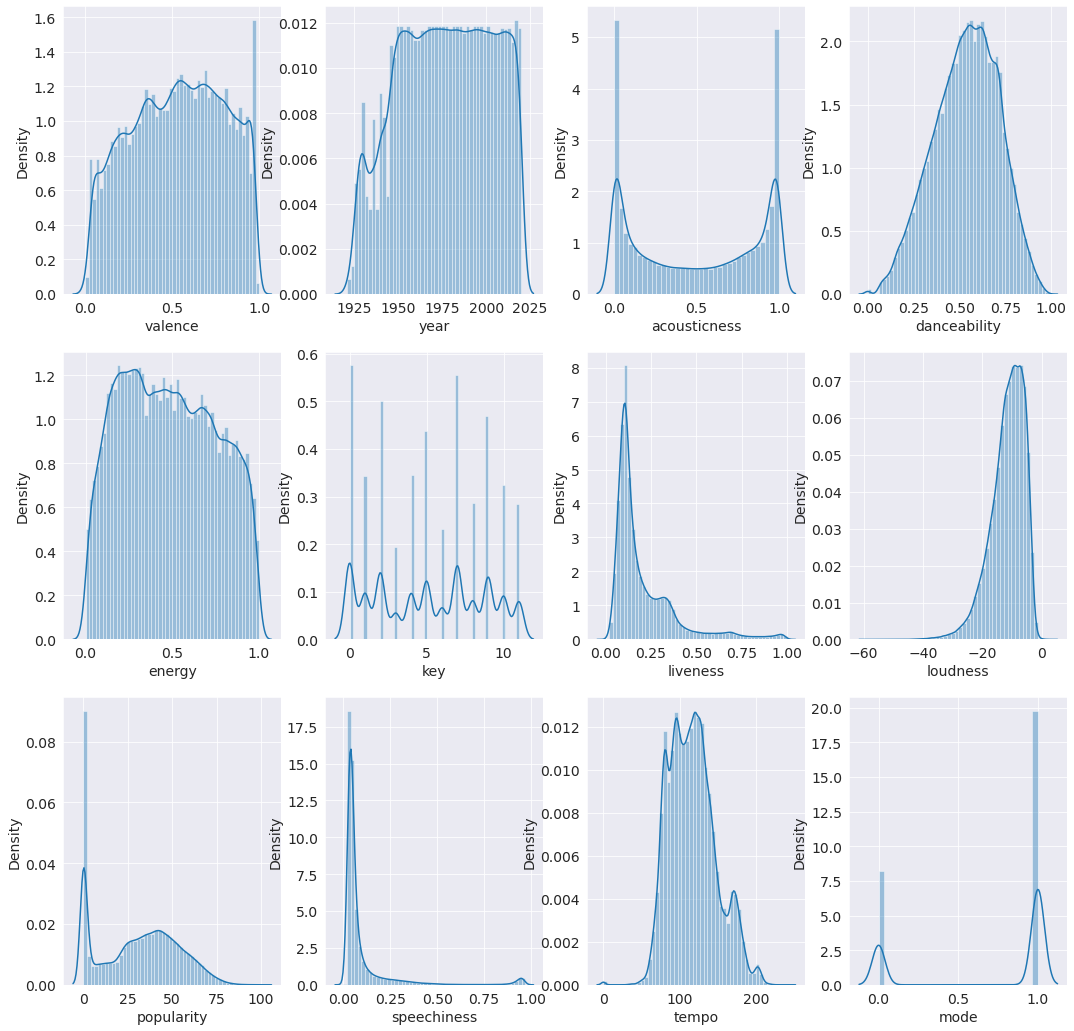

In [16]:
import warnings
warnings.filterwarnings("ignore")

# Lets visualize the variablility of all the columns in our data_df dataframe
# We will use subplots to display 12 plots in 3 rows and 4 columns

fig,ax = plt.subplots(3,4,figsize=(18,18))

sns.distplot(data_df['valence'],ax=ax[0,0])
sns.distplot(data_df['year'],ax=ax[0,1])
sns.distplot(data_df['acousticness'],ax=ax[0,2])
sns.distplot(data_df['danceability'],ax=ax[0,3])
sns.distplot(data_df['energy'],ax=ax[1,0])
sns.distplot(data_df['key'],ax=ax[1,1])
sns.distplot(data_df['liveness'],ax=ax[1,2])
sns.distplot(data_df['loudness'],ax=ax[1,3])
sns.distplot(data_df['popularity'],ax=ax[2,0])
sns.distplot(data_df['speechiness'],ax=ax[2,1])
sns.distplot(data_df['tempo'],ax=ax[2,2])
sns.distplot(data_df['mode'],ax=ax[2,3]);

In [17]:
correlation = data_df.corr()

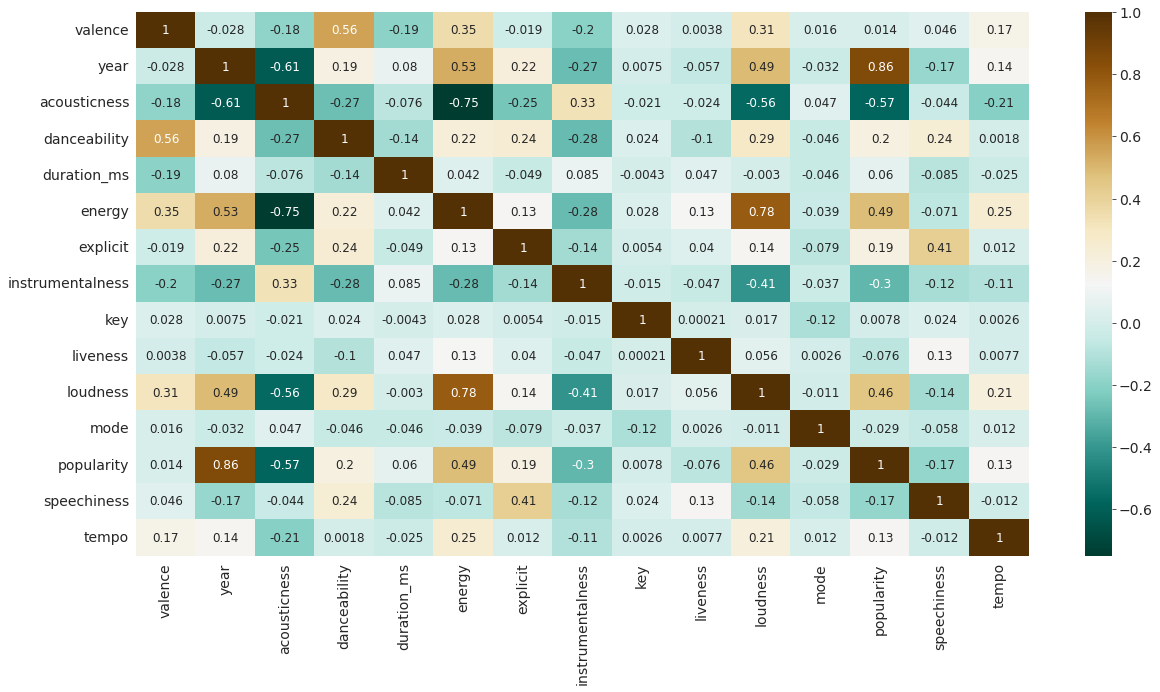

In [18]:
sns.heatmap(correlation,cmap='BrBG_r',annot_kws={"fontsize":12}, annot = True)

Observations we can make from the heatmap above:

  1. Year is highly positivily correlated to popularity. 
  2. acousticness is negatively correlated.

Here's how correlation coefficients can be interpreted:

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

<b> What are the top 20 tracks with highest average popularity? </b>

In [19]:
data_df[['name']].value_counts()

name                                                       
White Christmas                                                73
Winter Wonderland                                              63
Summertime                                                     56
Jingle Bells                                                   53
Overture                                                       46
                                                               ..
Prejudice                                                       1
Prelude & Fugue No. 10 in E Minor, BWV 855: Prelude             1
Prelude & Fugue No. 15 in G Major, BWV 860: Fugue               1
Prelude & Fugue No. 17 in A-Flat Major, BWV 886: Praeludium     1
!Que Vida! - Mono Version                                       1
Length: 133638, dtype: int64

We can clearly see that certains tracks have multiple values. Therefore, we will create a new dataframe containing names of tracks and their average/mean popularity. And, we will create a bar diagram to visualize the result.

In [20]:
popular_tracks = data_df.groupby('name')[['popularity']].mean().sort_values('popularity', ascending = False).reset_index().head(20)
popular_tracks

,name,popularity
0,Dakiti,100.0
1,Mood (feat. iann dior),99.0
2,What You Know Bout Love,96.0
3,WAP (feat. Megan Thee Stallion),96.0
4,Blinding Lights,96.0
5,Holy (feat. Chance The Rapper),95.0
6,Lonely (with benny blanco),95.0
7,you broke me first,95.0
8,Relación - Remix,94.0
9,Head & Heart (feat. MNEK),94.0


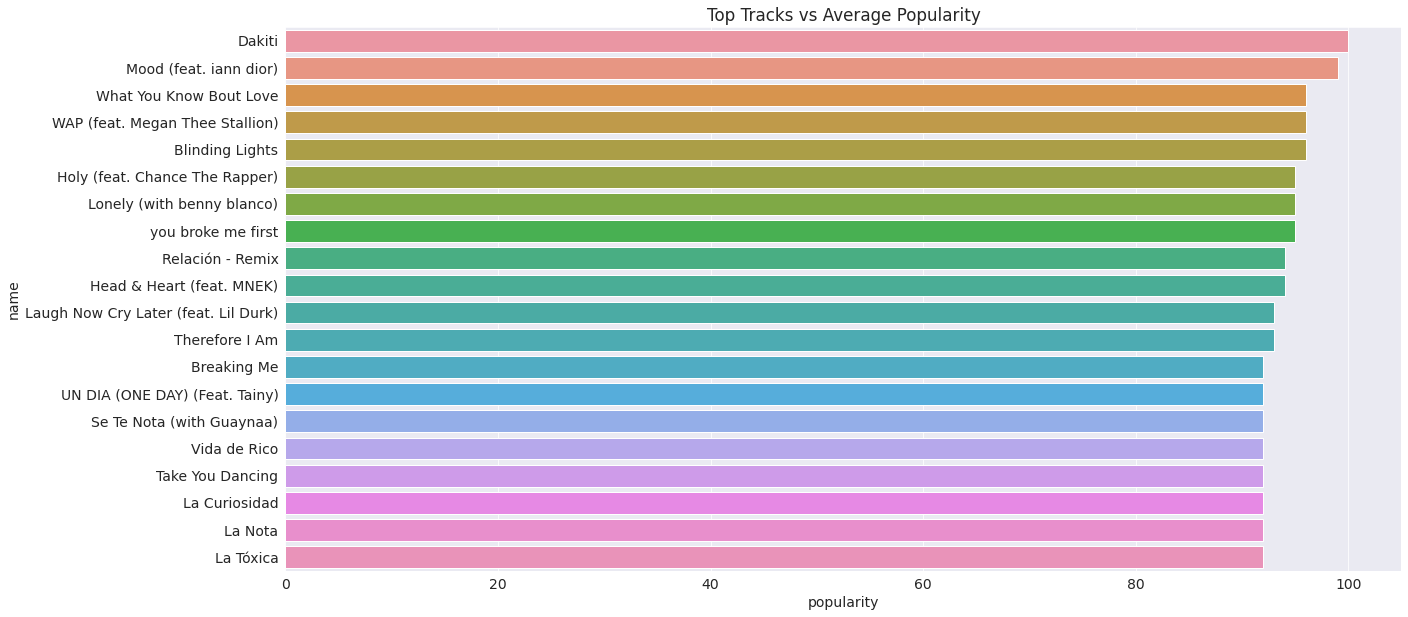

In [21]:
sns.barplot(x = 'popularity', y = 'name', data = popular_tracks).set(title = 'Top Tracks vs Average Popularity');

<b> Who are the top 20 artist with highest popularity? </b>

In [22]:
data_df['artists'].value_counts()

['Эрнест Хемингуэй']                                                                                                           1211
['Эрих Мария Ремарк']                                                                                                          1068
['Francisco Canaro']                                                                                                            942
['Frank Sinatra']                                                                                                               630
['Ignacio Corsini']                                                                                                             628
                                                                                                                               ... 
['Marcel Pagnol', 'Charpin', 'Vattier']                                                                                           1
['Sammie']                                                                  

It looks like some artists have multiple records. Therefore, we will take sum of their popularity

In [23]:
popular_artists = data_df.groupby('artists')[['popularity']].sum().sort_values('popularity', ascending = False).reset_index().head(20)
popular_artists

,artists,popularity
0,['The Beatles'],19218
1,['Frank Sinatra'],17987
2,['Elvis Presley'],17188
3,['The Rolling Stones'],16477
4,['Fleetwood Mac'],15675
5,['Bob Dylan'],14570
6,['Led Zeppelin'],13498
7,['Queen'],13202
8,['Johnny Cash'],12802
9,['The Beach Boys'],12216


In [24]:
popular_artists['artists'] = (popular_artists['artists']).str.replace("'", "")
popular_artists['artists'] = (popular_artists['artists']).str.replace("[", "")
popular_artists['artists'] = (popular_artists['artists']).str.replace("]", "")

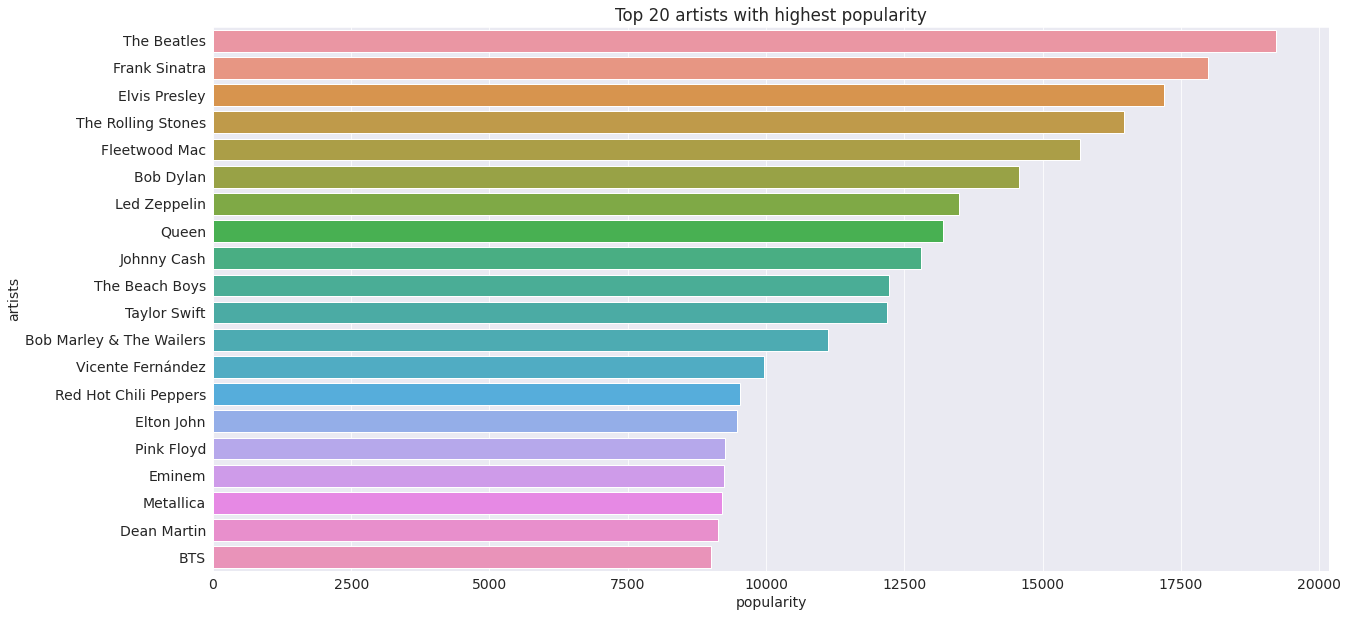

In [ ]:
sns.barplot(x = 'popularity', y = 'artists', data = popular_artists).set(title = "Top 20 artists with highest popularity");

We can clearly see that the artists `The beatles` have the highest popularity. Lets measure their popularity from 1921 to 2020 using sns.lineplot as well as matplotlib.plot

In [25]:
artist = popular_artists.artists[0]
artist

'The Beatles'

In [26]:
data_df['artists'] = (data_df['artists']).str.replace("'", "")
data_df['artists'] = (data_df['artists']).str.replace("[", "")
data_df['artists'] = (data_df['artists']).str.replace("]", "")

In [27]:
top_artist_df = data_df[data_df.artists == artist]
top_artist_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
8210,0.937,1963,0.641,The Beatles,0.482,155227,0.849,0,5ZBeML7Lf3FMEVviTyvi8l,0.000008,2,0.0414,-9.198,1,Twist And Shout - Remastered 2009,74,1963-03-22,0.0452,124.631
8217,0.971,1963,0.270,The Beatles,0.491,173947,0.801,0,3KiexfmhxHvG5IgAElmTkd,0.000000,4,0.0665,-9.835,1,I Saw Her Standing There - Remastered 2009,68,1963-03-22,0.0361,160.109
8220,0.900,1963,0.207,The Beatles,0.416,127853,0.563,0,4joiWvli4qJVEW6qZV2i2J,0.000000,1,0.3430,-8.724,0,All My Loving - Remastered 2009,67,1963-11-22,0.0298,77.560
8221,0.744,1963,0.386,The Beatles,0.520,141693,0.829,0,3VbGCXWRiouAq8VyMYN2MI,0.000062,0,0.2270,-6.228,1,Love Me Do - Remastered 2009,68,1963-03-22,0.0806,147.997
8224,0.646,1963,0.790,The Beatles,0.727,133507,0.338,0,0ESIjVxnDnCDaTPo6sStHm,0.000000,5,0.1050,-13.887,1,Till There Was You - Remastered 2009,63,1963-11-22,0.0454,122.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145139,0.574,1967,0.606,The Beatles,0.600,155200,0.326,0,2yw3UbhfFiopZBlECEOO05,0.000000,0,0.1850,-14.385,1,Being For The Benefit Of Mr. Kite! - Take 7,23,1967-05-26,0.1010,112.449
145188,0.315,1967,0.828,The Beatles,0.360,235667,0.313,0,1cUJR1XBKqBUKCsc9J1DRH,0.000026,5,0.1550,-13.814,1,Within You Without You - George Coaching The M...,22,1967-05-26,0.0401,119.292
152882,0.216,2006,0.676,The Beatles,0.417,226757,0.163,0,0FzGKD3N0jK6nNOyOJBvNG,0.000211,5,0.1120,-14.445,1,While My Guitar Gently Weeps,49,2006-11-17,0.0369,122.610
160395,0.522,1969,0.728,The Beatles,0.703,25987,0.215,0,6UCFZ9ZOFRxK8oak7MdPZu,0.000001,2,0.1300,-23.030,1,Her Majesty - Remastered 2009,22,1969-09-26,0.0892,100.874


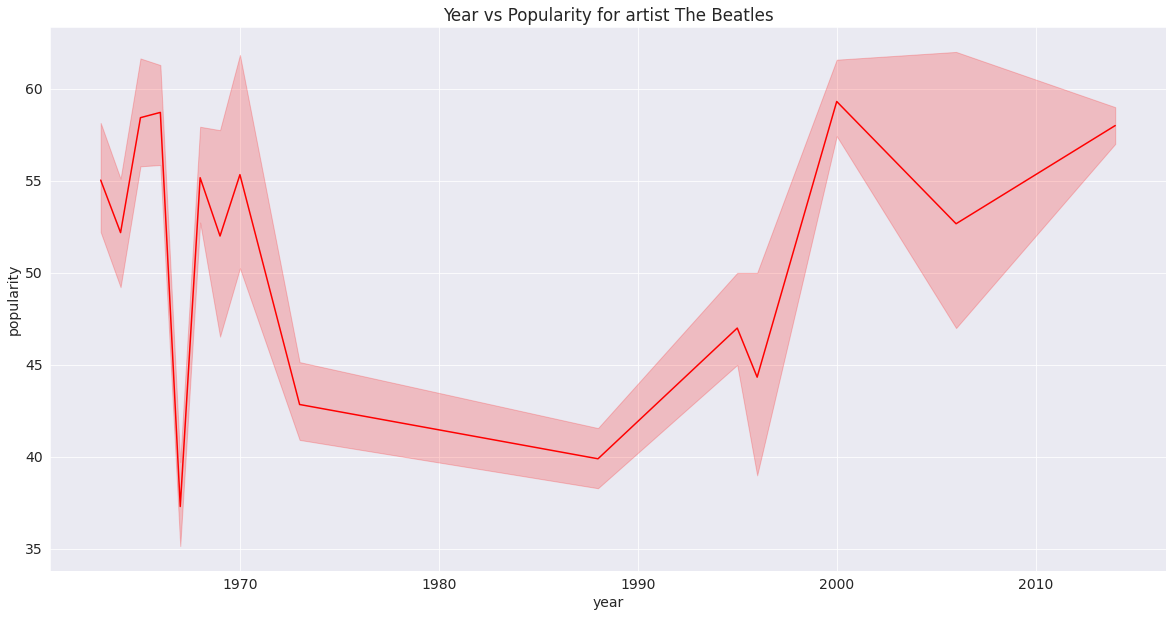

In [28]:
sns.lineplot(x = 'year', y = 'popularity', data = top_artist_df, color = 'red').set(title = 'Year vs Popularity for artist The Beatles');

We can cleary see that the artist's popularity was at peak during early 200s.

<b> Visualizing the characteristics of the song </b>

For `acousticness`

In [29]:
acousticness = data_df.groupby('year')[['acousticness']].mean().reset_index().sort_values('year')
acousticness

,year,acousticness
0,1921,0.886896
1,1922,0.938592
2,1923,0.957247
3,1924,0.940200
4,1925,0.962607
...,...,...
95,2016,0.284171
96,2017,0.286099
97,2018,0.267633
98,2019,0.278299


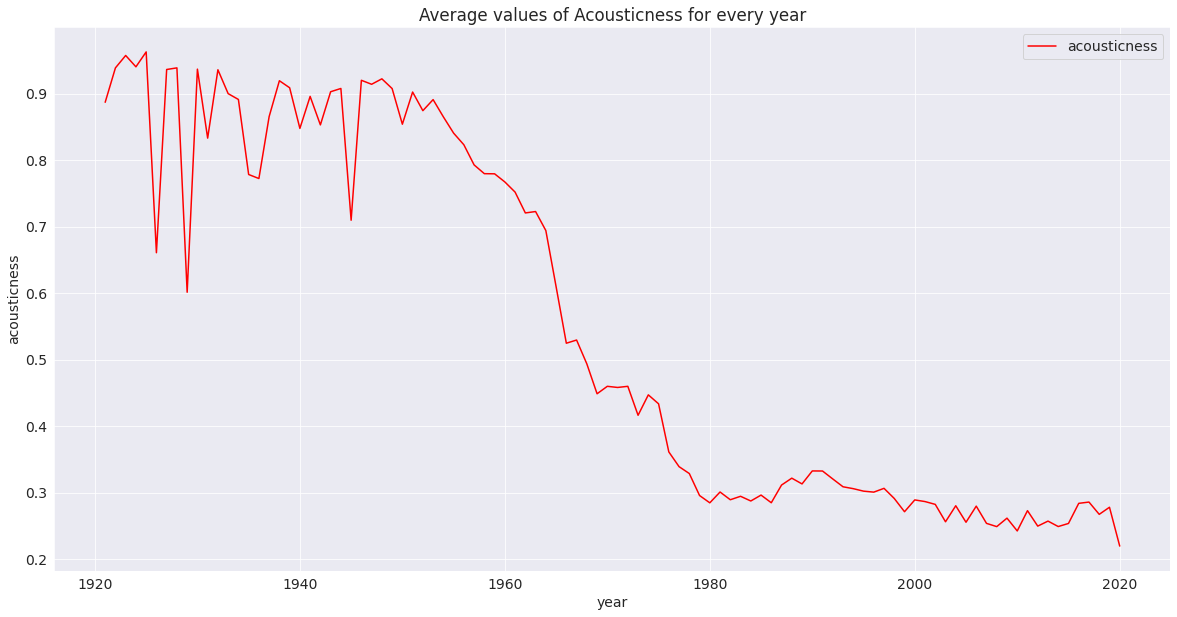

In [30]:
sns.lineplot(x = 'year', y = 'acousticness', data = acousticness, color = 'red').set(title = 'Average values of Acousticness for every year')
plt.legend(['acousticness']);

for `danceability`

In [31]:
danceability = data_df.groupby('year')[['danceability']].mean().reset_index().sort_values('year')
danceability

,year,danceability
0,1921,0.418597
1,1922,0.482042
2,1923,0.577341
3,1924,0.549894
4,1925,0.573863
...,...,...
95,2016,0.600202
96,2017,0.612217
97,2018,0.663500
98,2019,0.644814


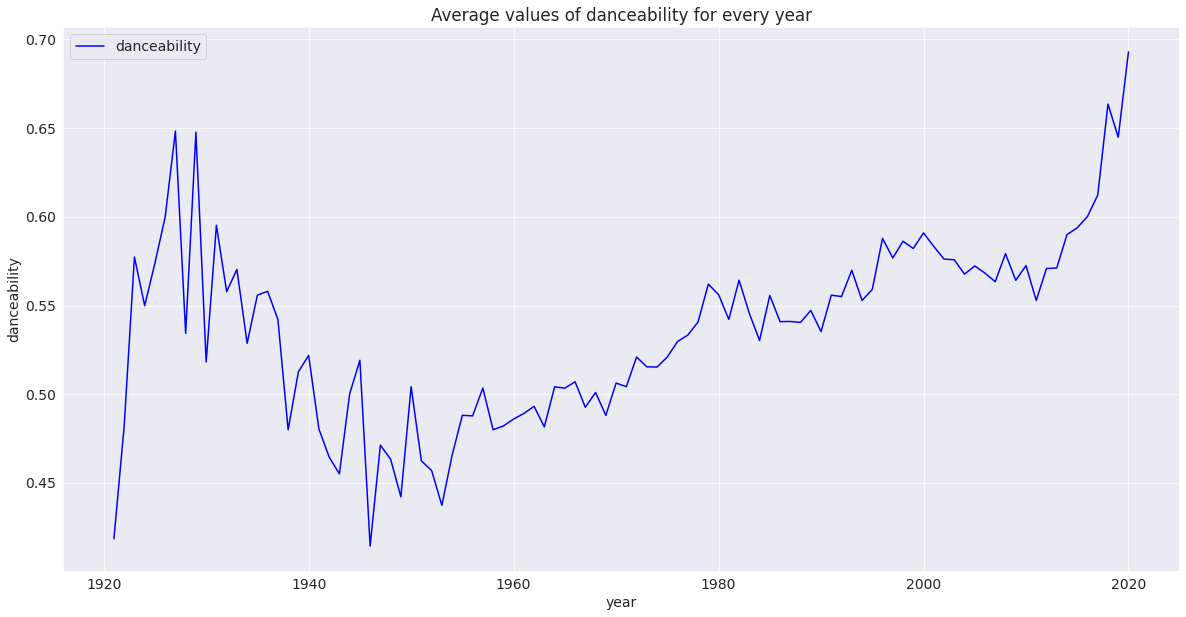

In [32]:
sns.lineplot(x = 'year', y = 'danceability', data = danceability, color = 'blue').set(title = 'Average values of danceability for every year')
plt.legend(['danceability']);

for `energy`

In [33]:
energy = data_df.groupby('year')[['energy']].mean().reset_index().sort_values('year')
energy

,year,energy
0,1921,0.231815
1,1922,0.237815
2,1923,0.262406
3,1924,0.344347
4,1925,0.278594
...,...,...
95,2016,0.592855
96,2017,0.590421
97,2018,0.602435
98,2019,0.593224


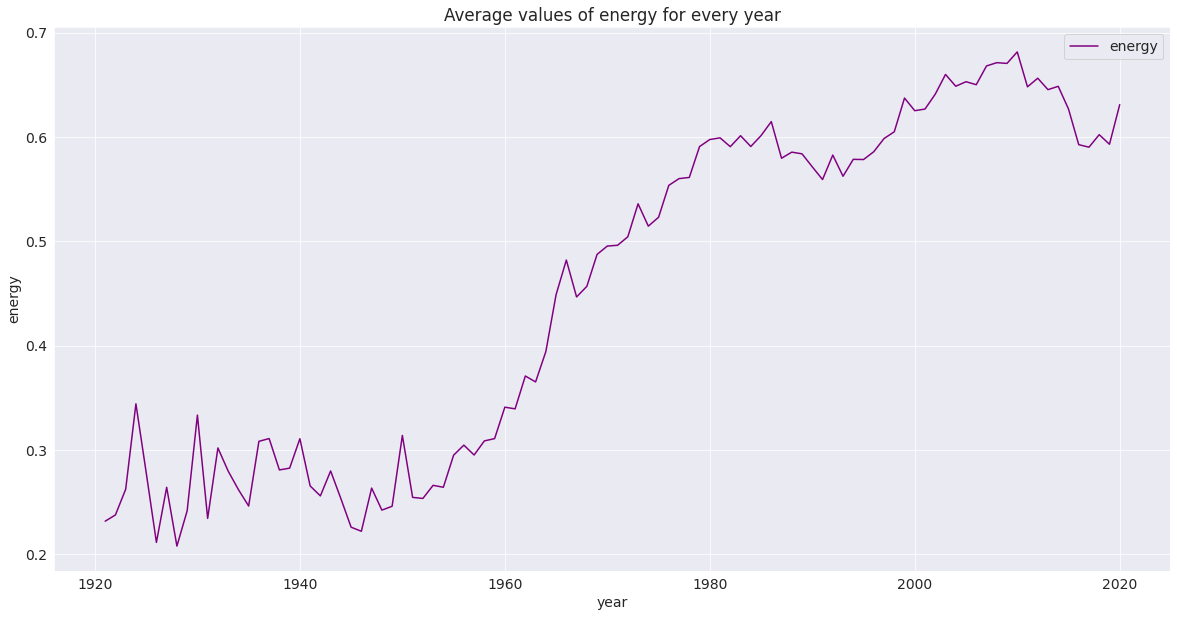

In [34]:
sns.lineplot(x = 'year', y = 'energy', data = energy, color = 'purple').set(title = 'Average values of energy for every year')
plt.legend(['energy']); 

for `speechiness`,`liveness`, and `valence`

In [35]:
columns = ["speechiness","liveness","valence"]

In [36]:
remaining = data_df.groupby('year')[['speechiness','liveness','valence']].mean().reset_index().sort_values('year')
remaining

,year,speechiness,liveness,valence
0,1921,0.073662,0.205710,0.379327
1,1922,0.116655,0.240720,0.535549
2,1923,0.093949,0.227462,0.625492
3,1924,0.092089,0.235219,0.663725
4,1925,0.111918,0.237668,0.621929
...,...,...,...,...
95,2016,0.104313,0.181170,0.431532
96,2017,0.110536,0.191713,0.416476
97,2018,0.127176,0.176326,0.447921
98,2019,0.121043,0.172616,0.458818


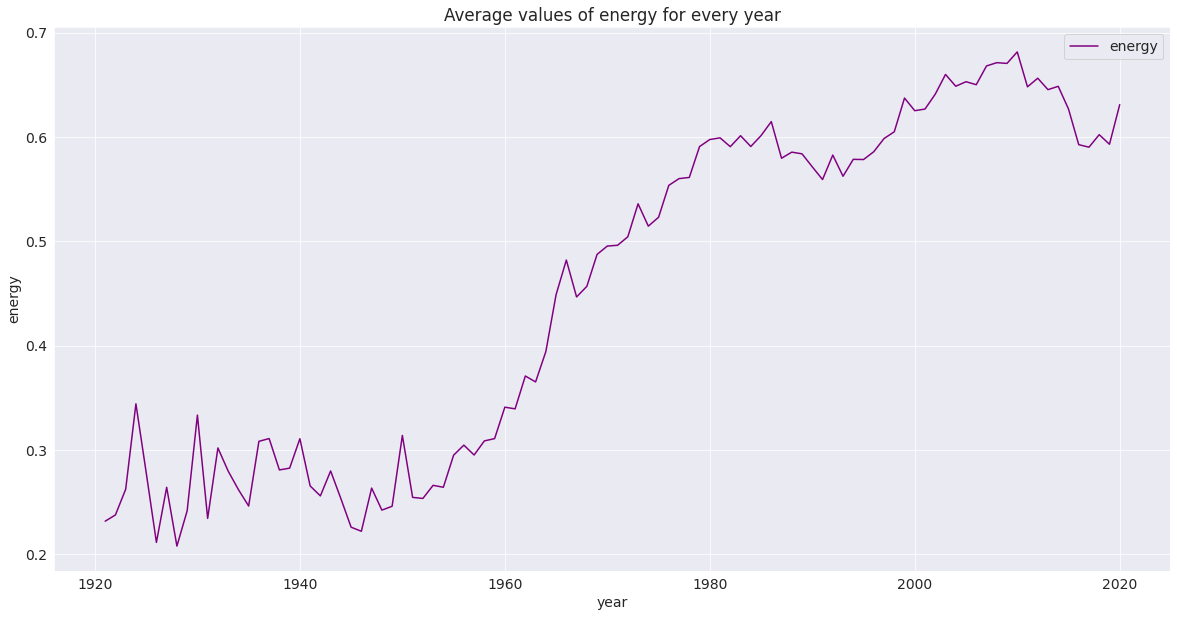

In [37]:
sns.lineplot(x = 'year', y = 'energy', data = energy, color = 'purple').set(title = 'Average values of energy for every year')
plt.legend(['energy']); 

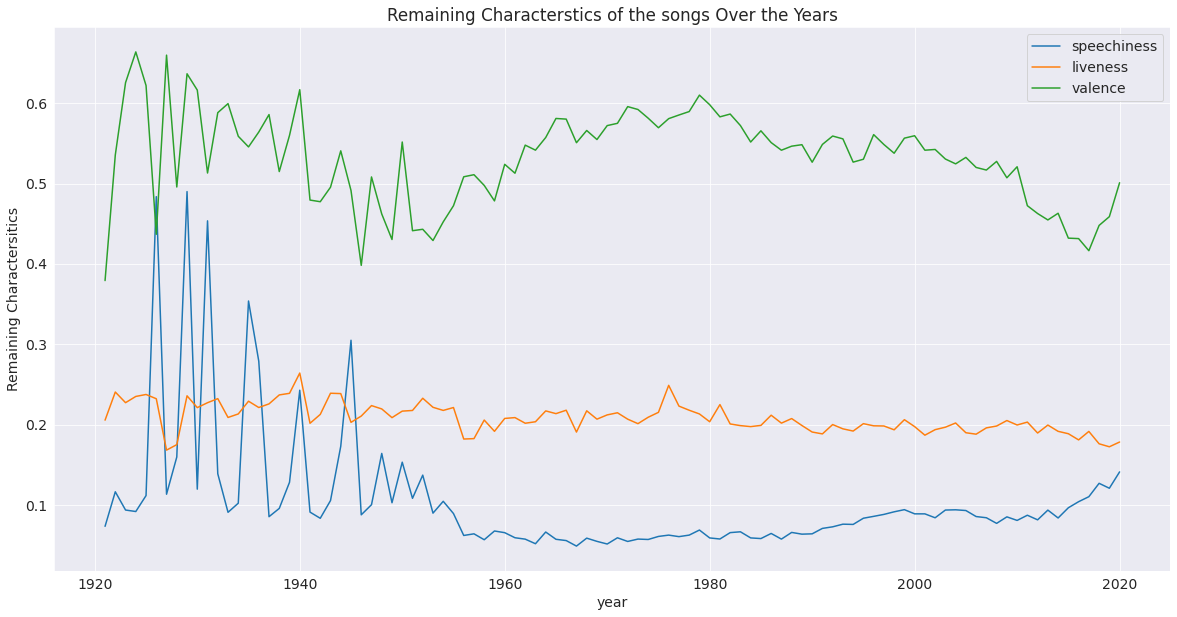

In [38]:
for i in columns:
  sns.lineplot(x = 'year', y = i, data = remaining)

plt.title('Remaining Characterstics of the songs Over the Years')
plt.ylabel('Remaining Charactersitics')
plt.legend(columns);

We can make the following observations:
  1. valence seems to be lowering in the mid 1950s. But overall, it seems relatively uniform.
  2. liveness of the songs is clearly uniformly distributed.
  3. speechiness of the songs is extremenly high from 1920 to 1940 as compared to other years.

<b> Who are the Top 20 artists with the maximum number of songs from 1921 to 2020 </b>

In [39]:
top_20_artists_with_most_songs = pd.DataFrame(data_df['artists'].value_counts()).reset_index().rename(columns = {'index':'artists','artists':'numbers'}).head(20)
top_20_artists_with_most_songs

,artists,numbers
0,Эрнест Хемингуэй,1211
1,Эрих Мария Ремарк,1068
2,Francisco Canaro,942
3,Frank Sinatra,630
4,Ignacio Corsini,628
5,Elvis Presley,504
6,Johnny Cash,484
7,Bob Dylan,474
8,The Rolling Stones,471
9,The Beach Boys,455


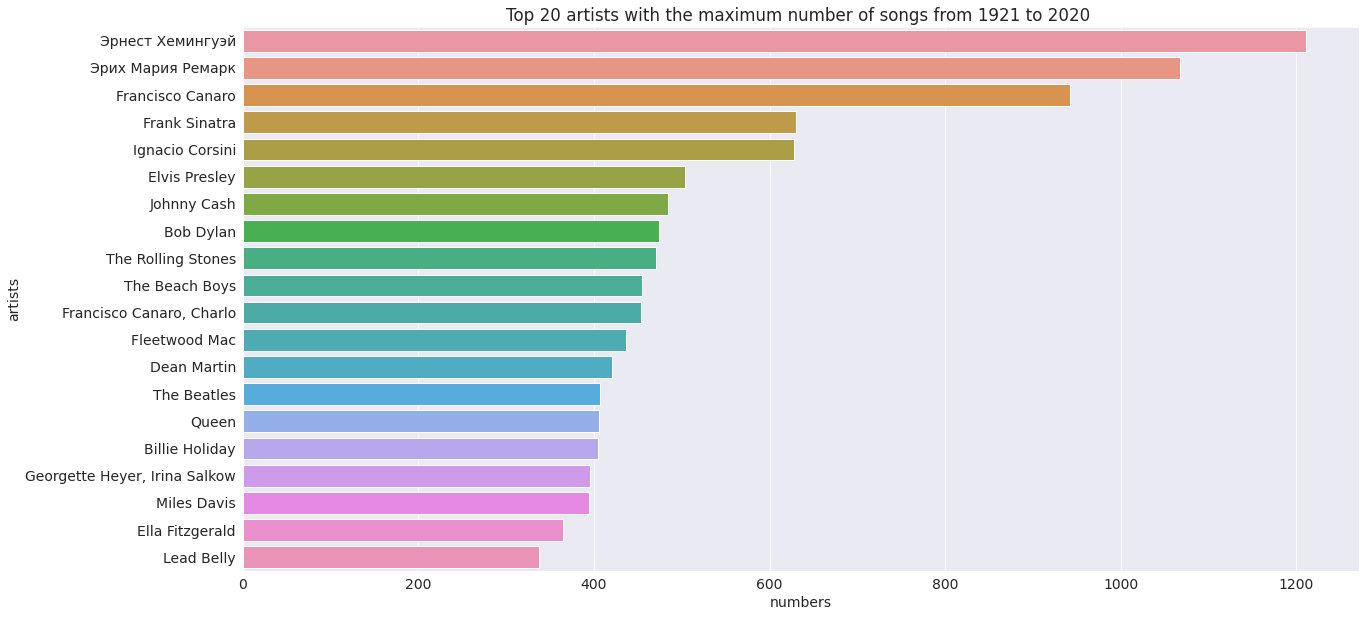

In [40]:
sns.barplot(x = 'numbers', y = 'artists', data = top_20_artists_with_most_songs).set(title = 'Top 20 artists with the maximum number of songs from 1921 to 2020 ');

We can clearly see that `Эрнест Хемингуэй` is the artist with most song. From the look of his name, I believe he is russian. However, I am not sure.

<b> What are the top 25 number of songs being released every year from 1921 to 2020? </b>

In [41]:
number_od_songs_every_year = pd.DataFrame(data_df['year'].value_counts()).reset_index().rename(columns = {'index':'year','year':'count'}).head(25)
number_od_songs_every_year

,year,count
0,2018,2103
1,2020,2030
2,2011,2017
3,2010,2016
4,2014,2005
5,2001,2005
6,1983,2000
7,1982,2000
8,1981,2000
9,1979,2000


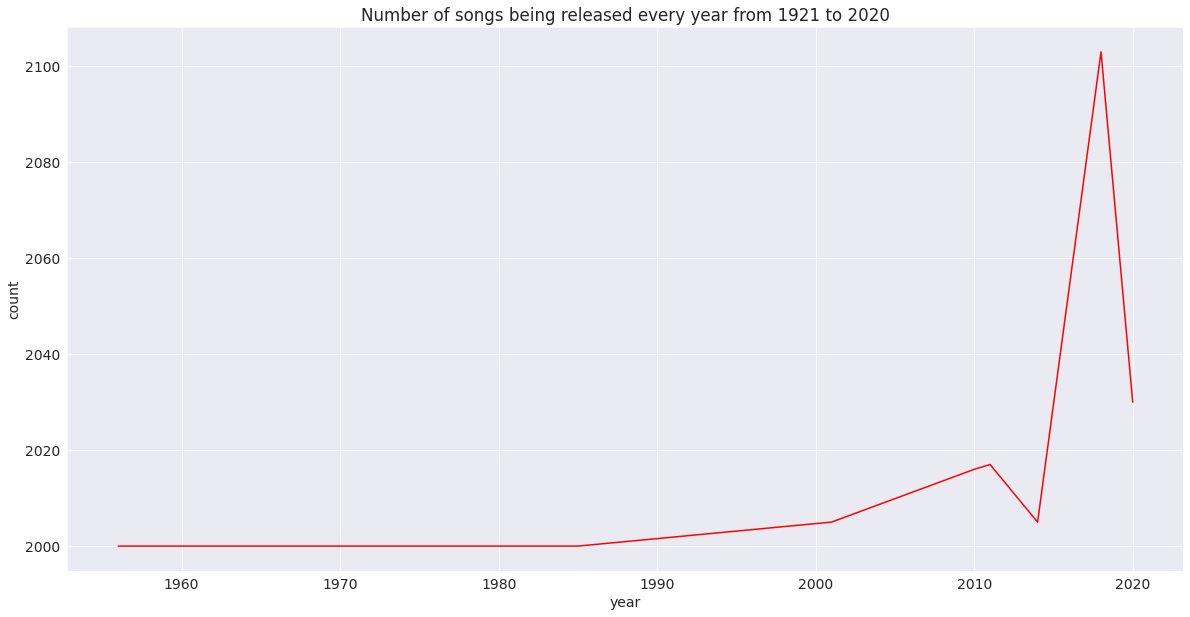

In [42]:
sns.lineplot(x = 'year', y = 'count', data = number_od_songs_every_year, color = 'red').set(title = 'Number of songs being released every year from 1921 to 2020');

We can clearly see that 2103 songs were released in 2018.

In [43]:
data_df[['key']].value_counts()

key
0      21600
7      20803
2      18823
9      17571
5      16430
4      12933
1      12886
10     12148
8      10751
11     10670
6       8741
3       7297
dtype: int64

<b> Key vs Popularity </b>

In [44]:
key_vs_popularity = data_df.groupby('key')[['popularity']].mean().reset_index()
key_vs_popularity

,key,popularity
0,0,30.765926
1,1,34.267577
2,2,31.877650
3,3,24.926271
4,4,33.025825
5,5,28.989349
6,6,34.116463
7,7,31.137192
8,8,30.554739
9,9,32.921291


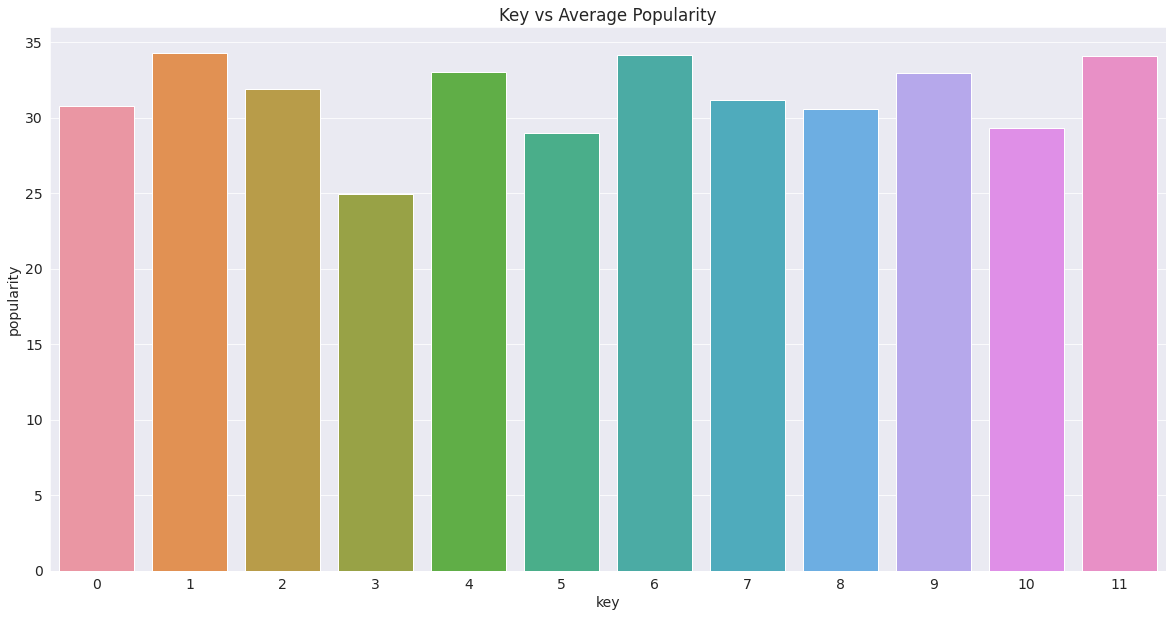

In [45]:
sns.barplot(x = 'key', y = 'popularity', data = key_vs_popularity).set(title = 'Key vs Average Popularity');

<b> Frequency of Key </b>

In [46]:
frequency_key = pd.DataFrame(data_df['key'].value_counts()).reset_index().rename(columns = {'index':'keys','key':'count'}).sort_values('count')
frequency_key

,keys,count
11,3,7297
10,6,8741
9,11,10670
8,8,10751
7,10,12148
6,1,12886
5,4,12933
4,5,16430
3,9,17571
2,2,18823


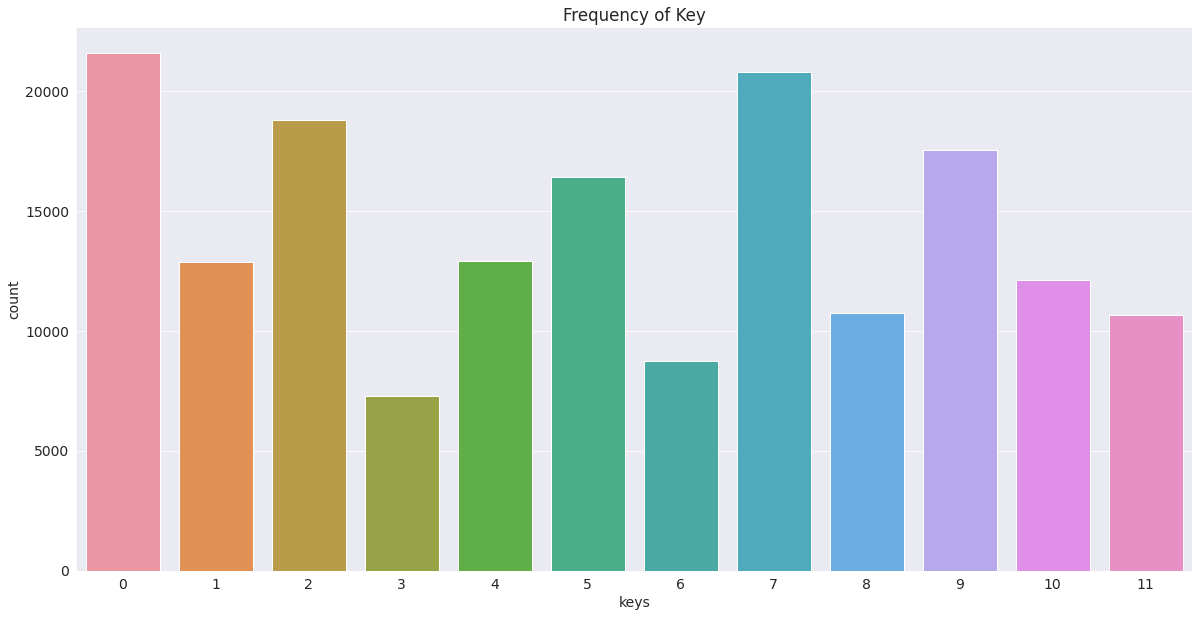

In [47]:
sns.barplot(x = 'keys', y = 'count', data = frequency_key).set(title = 'Frequency of Key');

<b> Visualizing top 10 genres's song characteristics with respect to popularity >/b> 

In [48]:
top_10_genre_popularity = data_by_genres.nlargest(10, 'popularity')
top_10_genre_popularity

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.81800,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.84700,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.87700,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.69800,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.88500,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.66000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.71175,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.76600,202627.000000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
575,1,circuit,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7
1239,1,guaracha,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


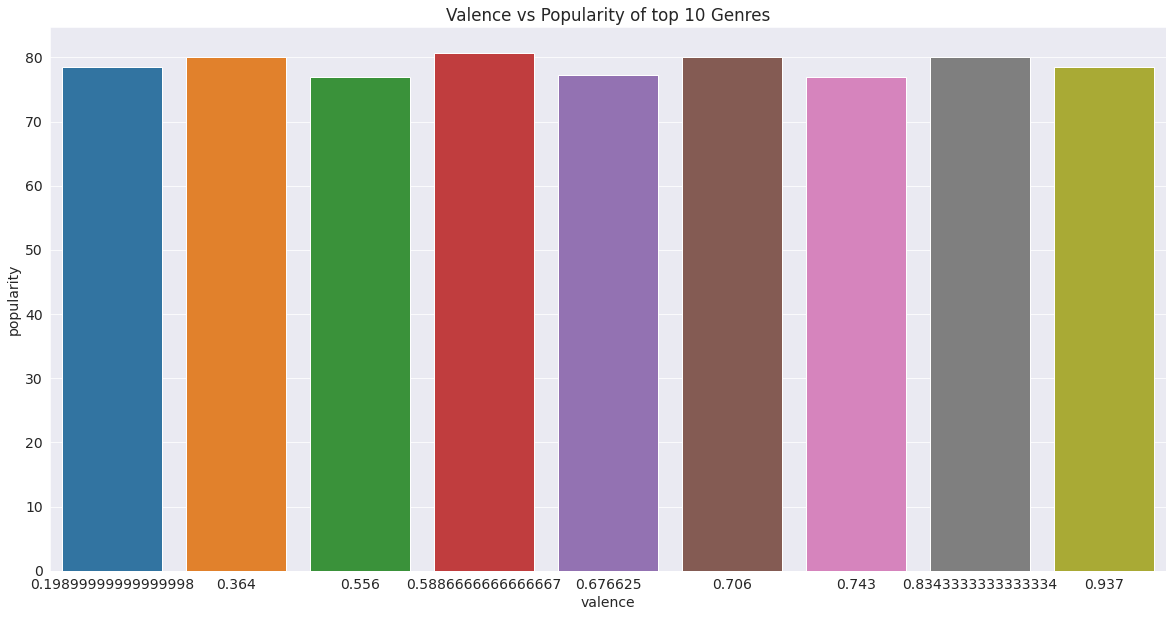

In [49]:
columns =  ['valence', 'energy', 'danceability', 'acousticness']

plt.title('Valence vs Popularity of top 10 Genres')
sns.barplot(x = columns[0], y = 'popularity', data =  top_10_genre_popularity);

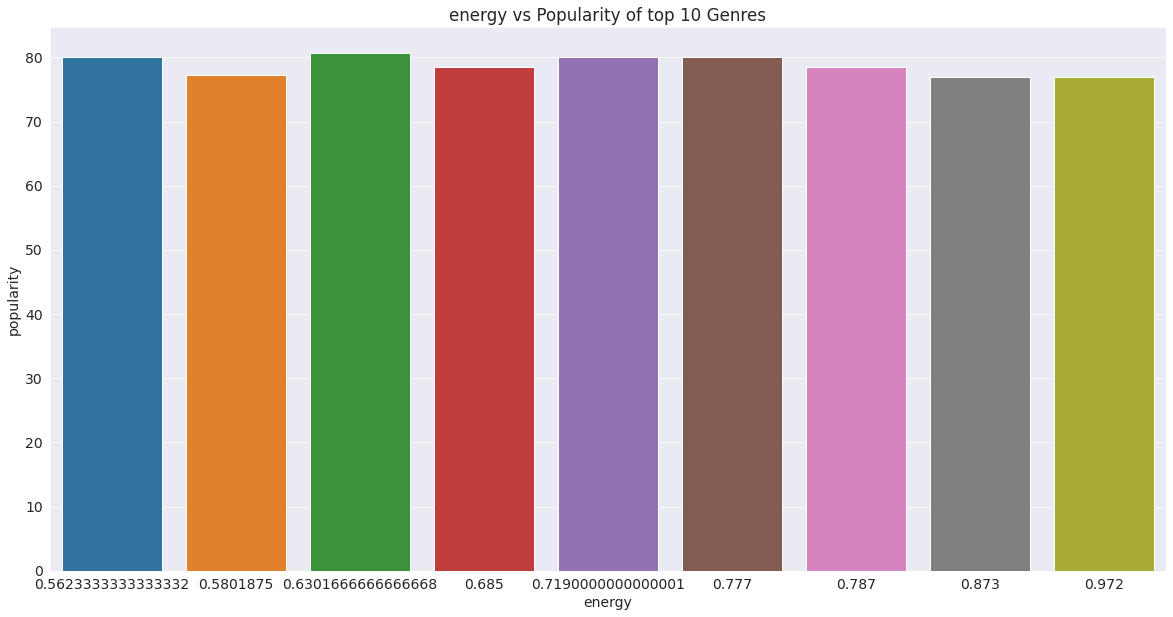

In [50]:
plt.title('energy vs Popularity of top 10 Genres')
sns.barplot(x = 'energy', y = 'popularity', data =  top_10_genre_popularity);

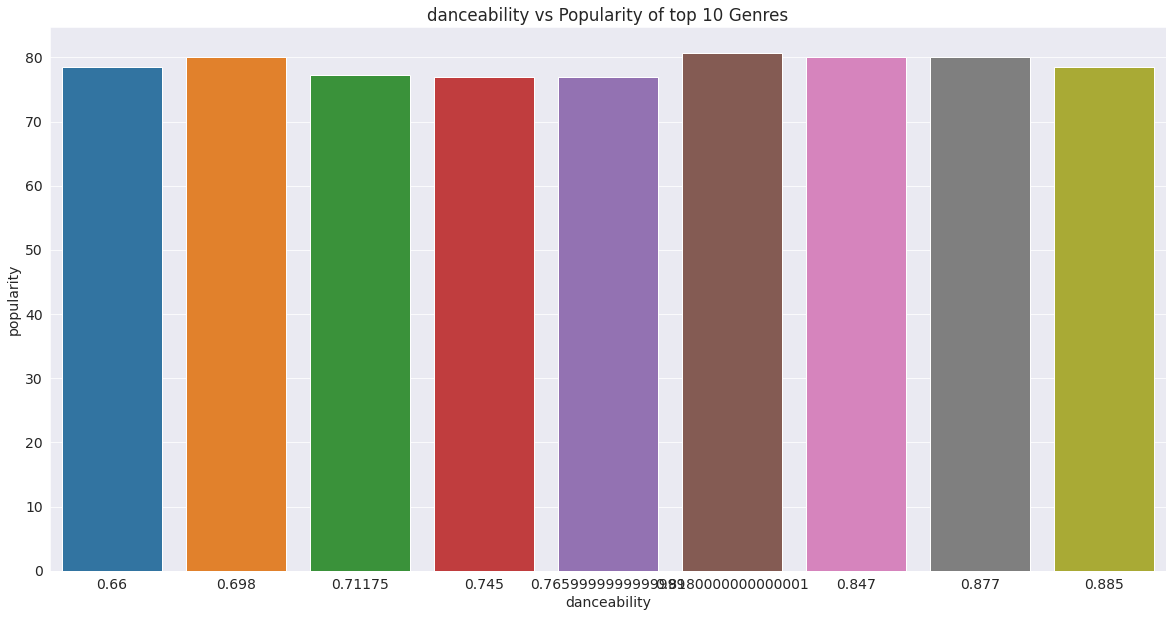

In [51]:
plt.title('danceability vs Popularity of top 10 Genres')
sns.barplot(x = 'danceability', y = 'popularity', data =  top_10_genre_popularity);

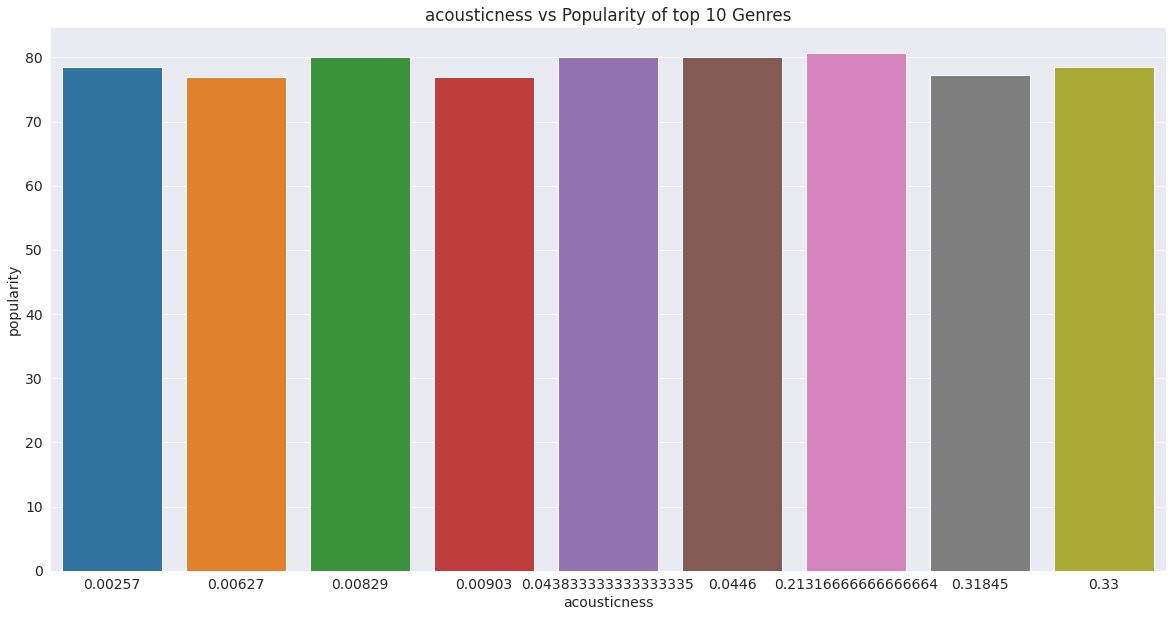

In [52]:
plt.title('acousticness vs Popularity of top 10 Genres')
sns.barplot(x = 'acousticness', y = 'popularity', data =  top_10_genre_popularity);

## Data Preprocessing and Feature Engineering

### Preprocessing

In [53]:
data_df.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954


In [54]:
data_artist.head(1)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.0114,0.290833,-14.448,0.210389,117.518111,0.3895,38.333333,5


In [55]:
data_df.sort_values('year', ascending = False, inplace = True)

In [56]:
data_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170652,0.6420,2020,0.1320,"KEVVO, J Balvin",0.856,189507,0.7210,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991
19608,0.3570,2020,0.0194,"Cardi B, Megan Thee Stallion",0.935,187541,0.4540,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073
19606,0.7560,2020,0.2210,"24kGoldn, iann dior",0.700,140526,0.7220,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989
75038,0.6380,2020,0.1600,"Joji, Lil Yachty",0.656,156759,0.7760,1,0f1G5SHFoFC9lO03gHCGVS,0.378000,6,0.3720,-6.184,1,Pretty Boy (feat. Lil Yachty),76,2020-09-25,0.0672,156.049
75039,0.5570,2020,0.0919,Polo G,0.807,176575,0.6650,1,40j4RoqmLiivqzRObbQ4BF,0.000000,5,0.0788,-5.249,0,I Know,73,2020-05-15,0.2760,164.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.2120,1921,0.9410,Dennis Day,0.241,196307,0.2740,0,4aVy85Y2sxMwIKmAcimHp0,0.000008,0,0.0984,-9.750,0,How Can You Buy Killarny,0,1921,0.0297,90.773
100,0.6570,1921,0.9950,Robert Jysor,0.421,187933,0.2310,0,4Zu1Kr6zfR04pETJbFh7Ox,0.000003,0,0.2730,-15.493,1,Dolorosa,0,1921,0.0528,82.769
99,0.4060,1921,0.4470,THE GUY,0.708,279171,0.5440,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,0,0.0733,-8.124,1,Don't Run,0,1921-09-11,0.0316,120.000
98,0.4510,1921,0.9950,Ignacio Corsini,0.592,168053,0.0322,0,4Rv29R4ydhHN9tYPfrZxTz,0.057300,5,0.2970,-25.844,0,China Hereje - Remasterizado,0,1921-03-20,0.2090,69.958


Perhaps it is best if we convert the values in column `duration_ms` into minutes from the above two dataframes.

In [57]:
# Note: 1 Minute = 60000 Milliseconds
data_df['duration_minutes'] = round(data_df['duration_ms'] / 60000, 3)
data_artist['duration_minutes'] = round(data_artist['duration_ms'] / 60000, 3)

Since we have used `duration_ms` column to create `duration_minutes` column in our two dataframes, its best to remove the original column.

In [58]:
data_df.drop(columns=['duration_ms'], axis = 1, inplace = True)
data_artist.drop(columns=['duration_ms'], axis = 1, inplace = True)

In the data_df's `artists` column, we can see that there are characters like `[`, `]`, `""`, `'` etc. We will remove those characters. But, lets verify the case is so first.

In [59]:
data_df[['artists']].sample(5, random_state = 42)    # sample selects certain rows randomly from the dataframe

,artists
8055,Nat King Cole
21359,"Billie Holiday, Teddy Wilson"
142634,"Richard Wagner, Keilberth, Varnay, Lorenz, Uhd..."
81181,Johnny Cash
75057,King Von


In [60]:
# Replacing the characters

# Replacing '
data_df['artists'] = (data_df['artists']).str.replace("'", "")

# Replacing [
data_df['artists'] = (data_df['artists']).str.replace("[", "")

# Replacing ]
data_df['artists'] = (data_df['artists']).str.replace("]", "")

# Replacing ","
#data_df['artists'] = (data_df['artists'].str.replace(","," "))

In [61]:
data_df[['artists']]

,artists
170652,"KEVVO, J Balvin"
19608,"Cardi B, Megan Thee Stallion"
19606,"24kGoldn, iann dior"
75038,"Joji, Lil Yachty"
75039,Polo G
...,...
101,Dennis Day
100,Robert Jysor
99,THE GUY
98,Ignacio Corsini


<b> What if we convert all the years from 1921 to 2020, to their decade versions? Like all the years from 1921 to 1929 would be represented as `1920s`. This way it is much easier to understand and visualize the data. </b>

In [62]:
# Lets create a new column decade to store which decade a song belongs.

# Setting all values of decade column into None
data_df['Decade'] = None

# For years between 1920 to 1930
data_df.loc[(data_df['year'] >= 1920) & (data_df['year'] < 1930), 'Decade'] = '1920s'

# For years between 1930 to 1940
data_df.loc[(data_df['year'] >= 1930) & (data_df['year'] < 1940), 'Decade'] = '1930s'

# For years between 1940 to 1950
data_df.loc[(data_df['year'] >= 1940) & (data_df['year'] < 1950), 'Decade'] = '1940s'

# For years between 1950 to 1960
data_df.loc[(data_df['year'] >= 1950) & (data_df['year'] < 1960), 'Decade'] = '1950s'

# For years between 1960 to 1970
data_df.loc[(data_df['year'] >= 1960) & (data_df['year'] < 1970), 'Decade'] = '1960s'

# For years between 1970 to 1980
data_df.loc[(data_df['year'] >= 1970) & (data_df['year'] < 1980) , 'Decade'] = '1970s'

# For years between 1980 to 1990
data_df.loc[(data_df['year'] >= 1980) & (data_df['year'] < 1990) , 'Decade'] = '1980s'

# For years between 1990 to 2000
data_df.loc[(data_df['year'] >= 1990) & (data_df['year'] < 2000) , 'Decade'] = '1990s'

# For years between 2000 to 2010
data_df.loc[(data_df['year'] >= 2000) & (data_df['year'] < 2010) , 'Decade'] = '2000s'

# For years between 2010 to 2020
data_df.loc[(data_df['year'] >= 2010) & (data_df['year'] < 2020) , 'Decade'] = '2010s'

# For years between 2020 to 2030
data_df.loc[(data_df['year'] >= 2020) & (data_df['year'] < 2030) , 'Decade'] = '2020s'

In [63]:
data_df.sample(3)

,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_minutes,Decade
155489,0.457,2020,0.513,"Quinn XCII, blackbear",0.712,0.497,0,1db6ixe9nX6cqt2V1DYZnW,0.000003,4,0.303,-7.943,1,Am I High Rn (feat. blackbear),65,2020-07-10,0.0639,93.953,3.331,2020s
100328,0.889,1978,0.561,Julio Iglesias,0.600,0.546,0,0eGfNm0NClissrIawgwK7z,0.000000,7,0.484,-13.652,0,Si Me Dejas No Vale - Si Mi Losci Non Vale,37,1978,0.0588,136.991,2.292,1970s
166684,0.732,2001,0.482,"""Los Bybys""",0.736,0.728,0,6dZozoP2G96tDz8YwWtu2y,0.000000,0,0.118,-7.020,0,"Te Extraño, Te Olvido, Te Amo",44,2001-01-01,0.0424,152.346,3.491,2000s


Lets remove unnecessary characters from data_with_genres dataframe's `genres` column like we did before

In [64]:
data_with_genres[['genres']]

,genres
0,['show tunes']
1,[]
2,[]
3,[]
4,[]
...,...
28675,[]
28676,"['c-pop', 'classic cantopop', 'classic mandopo..."
28677,[]
28678,"['chinese indie', 'chinese indie rock']"


In [65]:
data_with_genres['genres'] = data_with_genres['genres'].str.replace("[","")
data_with_genres['genres'] = data_with_genres['genres'].str.replace("]","")
data_with_genres['genres'] = data_with_genres['genres'].str.replace("'","")

In [66]:
data_with_genres[['genres']].sample(5)

,genres
5980,"disco, funk, motown, new jack swing, post-disc..."
21429,
22422,broadway
21313,"jazz funk, soul jazz"
13588,


In [67]:
# Lets drop duplicates 
data_df.duplicated().sum()

0

It doesnot seem like our dataset has duplicate values.

In [68]:
len(data_df['id'].unique()) == len(data_df)

True

We can also clearly see that every value in `id` column is unique. This results in total duplicate values in dataset being 0. So, lets check for duplicates one more time by removing the `id` column. Furthermore, `release_date` column could also result in redundancy. Perhaps its best to remove both columns. However, we will perform this operation in the copy of the original datadrame `data_df`.

In [69]:
data_new_df = data_df.copy()

In [70]:
data_new_df.drop(columns = ['id','release_date'], inplace = True, axis = 1)

In [71]:
data_new_df.duplicated().sum()

565

well well well. There seems to be about 565 duplicate values in the dataset after all. Lets remove the duplicates.

In [72]:
data_new_df.drop_duplicates(inplace = True)

In [73]:
data_new_df.shape

(170088, 18)

In [74]:
data_new_df.duplicated().sum()

0

It looks like all the duplicates are removed.

In [75]:
data_artist.duplicated().sum(), data_by_genres.duplicated().sum(), data_with_genres.duplicated().sum(), data_year.duplicated().sum()

(0, 0, 0, 0)

<b> A Great Observation I Noticed from the internet </b>

In [76]:
total_time = data_new_df.duration_minutes.sum() / (24*365*60)

In [77]:
print("Spotify has songs of total length worth more than {} years".format(round(total_time, 3)))

Spotify has songs of total length worth more than 1.246 years


### Selecting Features

<b> We will select certain features with which we will train our models<b>

In [78]:
data_new_df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'speechiness', 'tempo', 'duration_minutes',
       'Decade'],
      dtype='object')

In [79]:
len(data_new_df['name'].unique())

133638

We can clearly see that the name column has simply too many unique values. This is probably because the dataset contains the names of different artists. Nevertheless, We will be dropping the column.

In [80]:
data_new_df['name']

170652                      Billetes Azules (with J Balvin)
19608                       WAP (feat. Megan Thee Stallion)
19606                                Mood (feat. iann dior)
75038                         Pretty Boy (feat. Lil Yachty)
75039                                                I Know
                                ...                        
101                                How Can You Buy Killarny
100                                                Dolorosa
99                                                Don't Run
98                             China Hereje - Remasterizado
0         Piano Concerto No. 3 in D Minor, Op. 30: III. ...
Name: name, Length: 170088, dtype: object

<v> Here, I will drop some columns such as ‘id’, ‘name’, ‘artists’, ‘release date’, and ‘year’ as these columns do not contribute much to the features of a song. The remaining columns will be used. </b> 

In [81]:
unnecessary_cols = ['name', 'artists', 'year']

### Feature Engineering

In [82]:
data_new_df = data_new_df.drop(columns = unnecessary_cols, axis = 1)

In [83]:
data_new_df.duplicated().sum()

238

In [84]:
data_new_df.drop_duplicates(inplace = True)

<b> Scaling the numerical features using MinMax Scaler </b>

In [85]:
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_datatypes_df = data_new_df[data_new_df.select_dtypes(include = datatypes).columns.to_list()]
numerical_datatypes_df

# Equivalent: data_new_df[data_new_df.select_dtypes(include = np.number).columns.to_list()]

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,duration_minutes
170652,0.6420,0.1320,0.856,0.7210,1,0.004710,7,0.1820,-4.928,1,74,0.1080,94.991,3.158
19608,0.3570,0.0194,0.935,0.4540,1,0.000000,1,0.0824,-7.509,1,96,0.3750,133.073,3.126
19606,0.7560,0.2210,0.700,0.7220,1,0.000000,7,0.2720,-3.558,0,99,0.0369,90.989,2.342
75038,0.6380,0.1600,0.656,0.7760,1,0.378000,6,0.3720,-6.184,1,76,0.0672,156.049,2.613
75039,0.5570,0.0919,0.807,0.6650,1,0.000000,5,0.0788,-5.249,0,73,0.2760,164.964,2.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.2120,0.9410,0.241,0.2740,0,0.000008,0,0.0984,-9.750,0,0,0.0297,90.773,3.272
100,0.6570,0.9950,0.421,0.2310,0,0.000003,0,0.2730,-15.493,1,0,0.0528,82.769,3.132
99,0.4060,0.4470,0.708,0.5440,1,0.037500,0,0.0733,-8.124,1,0,0.0316,120.000,4.653
98,0.4510,0.9950,0.592,0.0322,0,0.057300,5,0.2970,-25.844,0,0,0.2090,69.958,2.801


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns = numerical_datatypes_df.columns.to_list()

In [87]:
data_new_df[columns] = scaler.fit_transform(numerical_datatypes_df)

In [88]:
data_new_df.drop('Decade', axis = 1, inplace = True)
data_new_df

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,duration_minutes
170652,0.6420,0.132530,0.866397,0.7210,1.0,0.004710,0.636364,0.1820,0.862454,1.0,0.74,0.111340,0.390096,0.034155
19608,0.3570,0.019478,0.946356,0.4540,1.0,0.000000,0.090909,0.0824,0.822034,1.0,0.96,0.386598,0.546485,0.033799
19606,0.7560,0.221888,0.708502,0.7220,1.0,0.000000,0.636364,0.2720,0.883909,0.0,0.99,0.038041,0.373661,0.025085
75038,0.6380,0.160643,0.663968,0.7760,1.0,0.378000,0.545455,0.3720,0.842784,1.0,0.76,0.069278,0.640840,0.028097
75039,0.5570,0.092269,0.816802,0.6650,1.0,0.000000,0.454545,0.0788,0.857427,0.0,0.73,0.284536,0.677451,0.031765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.2120,0.944779,0.243927,0.2740,0.0,0.000008,0.000000,0.0984,0.786939,0.0,0.00,0.030619,0.372774,0.035422
100,0.6570,0.998996,0.426113,0.2310,0.0,0.000003,0.000000,0.2730,0.697001,1.0,0.00,0.054433,0.339904,0.033866
99,0.4060,0.448795,0.716599,0.5440,1.0,0.037500,0.000000,0.0733,0.812403,1.0,0.00,0.032577,0.492799,0.050771
98,0.4510,0.998996,0.599190,0.0322,0.0,0.057300,0.454545,0.2970,0.534899,0.0,0.00,0.215464,0.287294,0.030187


### Using Kmeans Clustering

In [89]:
# Lets use Kmeans Clustering 
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 30, n_jobs = -1)

In [90]:
pred = KMeans.fit_predict(data_new_df.select_dtypes(np.number))    # Fitting and Prediction in same line

In [91]:
data_new_df['cluster_no'] = pred 

## Building the System

In [92]:
selected_columns = data_new_df.columns.to_list()[:-1]

In [93]:
selected_columns

['valence',
 'acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'duration_minutes']

<b> Using Column Transformer </b>

In [94]:
from sklearn.compose import ColumnTransformer 

In [95]:
pre_process = ColumnTransformer(remainder = 'passthrough',
                                transformers = [('scaler', MinMaxScaler(), selected_columns)])

<b> Creating and Using a Pipeline </b>

In [96]:
from sklearn.cluster import KMeans
#from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('preprocessing', ColumnTransformer(remainder = 'passthrough',
                                transformers = [('scaler', MinMaxScaler(), selected_columns)])),('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

In [97]:
pipeline

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['valence', 'acousticness',
                                                   'danceability', 'energy',
                                                   'explicit',
                                                   'instrumentalness', 'key',
                                                   'liveness', 'loudness',
                                                   'mode', 'popularity',
           

In [98]:
set(selected_columns).issubset(set(data_df.columns.to_list()))

True

<b> Using pipeline developed into the original dataframe data_df

In [99]:
pipeline.fit(data_df[selected_columns])

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['valence', 'acousticness',
                                                   'danceability', 'energy',
                                                   'explicit',
                                                   'instrumentalness', 'key',
                                                   'liveness', 'loudness',
                                                   'mode', 'popularity',
           

In [100]:
data_df['cluster_no'] = pipeline.predict(data_df[selected_columns])

In [101]:
data_df[selected_columns] = MinMaxScaler().fit_transform(data_df[selected_columns])

<b> Writing the System </b>

In [102]:
from tqdm import tqdm

In [103]:
{'year':1,'artists':3,'id':7,'name':13,'release_date':15,'Decade':19}

{'Decade': 19,
 'artists': 3,
 'id': 7,
 'name': 13,
 'release_date': 15,
 'year': 1}

In [105]:
def select_artist(song,artist):
  artist_names = [i.split(",") for i in list(data_df[data_df.name.str.lower() == song.lower()]['artists'])]

  for i in range(len(artist_names)): 
    for j in range(len(artist_names[i])):        
      if (artist_names[i][j].lower().strip() == artist.lower()):
        return i 

In [106]:
def Song_Recommendation(song, n_recommendations,artist_name):
  """
  Here, Manhattan Distance is calculated for all songs, and the songs with least Manhattan distance with the selected songs
  are used to recommend songs to the user.
  """
  distance = []
  artist_names_index = select_artist(song,artist_name)
  print(artist_names_index)
  selected_song = data_df[(data_df['name'].str.lower() == song.lower())].values[artist_names_index]
  remaining_song = data_df[data_df.name.str.lower() != song.lower()]

  for songs in tqdm(remaining_song.values):
    d = 0
    for col in np.arange(len(remaining_song.columns)):
      # Indices of the columns that will not be used
      if not col in [1,3,7,13,15,19,20]:
        d = d + np.absolute(float(selected_song[col]) - float(songs[col]))
    distance.append(d)
  remaining_song['distance'] = distance
  remaining_song = remaining_song.sort_values('distance')
  columns = ['artists', 'name']
  return remaining_song[columns][:n_recommendations]

Song_Recommendation('love yourself', 10, 'Justin Bieber')

0


100%|██████████| 170652/170652 [00:15<00:00, 11013.75it/s]


,artists,name
10666,Tim Curry,Sweet Transvestite
74907,gnash,the broken hearts club
36472,Straight No Chaser,The 12 Days of Christmas
38277,Kaash Paige,Love Songs - Bonus
18746,"Phillipa Soo, Anthony Ramos, Lin-Manuel Mirand...",Take a Break
170527,Sam Smith,Young
8418,The Everly Brothers,All I Have to Do Is Dream
8215,Bob Dylan,"Don't Think Twice, It's All Right"
17253,Ron Pope,A Drop In The Ocean
7450,Marty Robbins,Cool Water


In [107]:
import pickle

In [108]:
pickle.dump(pipeline, open('pipeline.pkl','wb'))

In [109]:
pickle.dump(pre_process, open('columnTransformer.pkl', 'wb'))

In [110]:
pickle.dump(selected_columns, open('SelectedColumns.pkl','wb'))

In [111]:
pickle.dump(data_df, open('data_df.pkl','wb'))

# Thank you
# Please, Check my other projects as well on github